[View in Colaboratory](https://colab.research.google.com/github/yash12khandelwal/Data-Analysis/blob/master/AnalyzeThis.ipynb)

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import io

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import files
from google.colab import files

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#data manipulation
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
#Upload train dataset
train = files.upload()

Saving Training_dataset_Original.csv to Training_dataset_Original.csv


In [5]:
#Upload predict dataset
predict1 = files.upload()

Saving Predict.csv to Predict.csv


In [0]:
#Read train and predict dataset
df_train = pd.read_csv(io.StringIO(train['Training_dataset_Original.csv'].decode('utf-8')),na_values = ['na','missing','N/A','NaN'])
df_predict = pd.read_csv(io.StringIO(predict['Leaderboard_dataset.csv'].decode('utf-8')),na_values = ['na','missing','N/A','NaN'])

In [36]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(47)

,Total,Percent
mvar40,62557,0.781963
mvar31,56218,0.702725
mvar41,54578,0.682225
mvar45,44855,0.560688
mvar11,44819,0.560238
mvar23,40248,0.503100
mvar30,36417,0.455213
mvar35,33014,0.412675
mvar15,32067,0.400838
mvar22,29124,0.364050


In [0]:
#Creating y_train by saving saved labels into it
y_train = df_train['default_ind']

Dropped mvar6 because it was having minimum credit value and credit score should not depend much on that.
It worked well


In [0]:
#Dropping features from train and predict dataset which are of no use
df_train = df_train.drop(['mvar6', 'mvar11', 'mvar15', 'mvar21', 'mvar22', 'mvar23', 'mvar30', 'mvar31', 'mvar35', 'mvar40', 'mvar41', 'mvar45','default_ind'], axis=1)
df_predict = df_predict.drop(['mvar6', 'mvar11', 'mvar15', 'mvar21', 'mvar22', 'mvar23', 'mvar30', 'mvar31', 'mvar35', 'mvar40', 'mvar41', 'mvar45'], axis=1)

In [0]:
#Taking mean to impute missing data points of train dataset
X_train['mvar1'].fillna(X_train['mvar1'].mean(), inplace=True)
X_train['mvar2'].fillna(X_train['mvar2'].mean(), inplace=True)
X_train['mvar3'].fillna(X_train['mvar3'].mean(), inplace=True)
X_train['mvar4'].fillna(X_train['mvar4'].mean(), inplace=True)
X_train['mvar5'].fillna(X_train['mvar5'].mean(), inplace=True)
#X_train['mvar6'].fillna(X_train['mvar6'].mean(), inplace=True)
X_train['mvar7'].fillna(X_train['mvar7'].mean(), inplace=True)
X_train['mvar8'].fillna(X_train['mvar8'].mean(), inplace=True)
X_train['mvar9'].fillna(X_train['mvar9'].mean(), inplace=True)
X_train['mvar10'].fillna(X_train['mvar10'].mean(), inplace=True)
X_train['mvar12'].fillna(X_train['mvar12'].mean(), inplace=True)
X_train['mvar13'].fillna(X_train['mvar13'].mean(), inplace=True)
X_train['mvar16'].fillna(X_train['mvar16'].mean(), inplace=True)
X_train['mvar17'].fillna(X_train['mvar17'].mean(), inplace=True)
X_train['mvar18'].fillna(X_train['mvar18'].mean(), inplace=True)
X_train['mvar19'].fillna(X_train['mvar19'].mean(), inplace=True)
X_train['mvar20'].fillna(X_train['mvar20'].mean(), inplace=True)
X_train['mvar24'].fillna(X_train['mvar24'].mean(), inplace=True)
X_train['mvar25'].fillna(X_train['mvar25'].mean(), inplace=True)
X_train['mvar26'].fillna(X_train['mvar26'].mean(), inplace=True)
X_train['mvar27'].fillna(X_train['mvar27'].mean(), inplace=True)
X_train['mvar28'].fillna(X_train['mvar28'].mean(), inplace=True)
X_train['mvar29'].fillna(X_train['mvar29'].mean(), inplace=True)
X_train['mvar32'].fillna(X_train['mvar32'].mean(), inplace=True)
X_train['mvar33'].fillna(X_train['mvar33'].mean(), inplace=True)
X_train['mvar42'].fillna(X_train['mvar42'].mean(), inplace=True)
X_train['mvar43'].fillna(X_train['mvar43'].mean(), inplace=True)
X_train['mvar44'].fillna(X_train['mvar44'].mean(), inplace=True)

#Imputing all missing values by mode
X_train['mvar34'].fillna(X_train['mvar34'].mean(), inplace=True)
X_train['mvar36'].fillna(X_train['mvar36'].mean(), inplace=True)
X_train['mvar37'].fillna(X_train['mvar37'].mean(), inplace=True)
X_train['mvar38'].fillna(X_train['mvar38'].mean(), inplace=True)
X_train['mvar39'].fillna(X_train['mvar39'].mean(), inplace=True)
#X_train['mvar46'].fillna(X_train['mvar46'].mean(), inplace=True)

#Imputing all missing values by 0 because it is occuring very frequntly
#X_train['mvar46'].fillna(0, inplace=True)

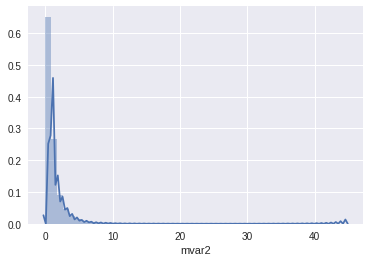

In [136]:
sns.distplot(X_train['mvar2']);

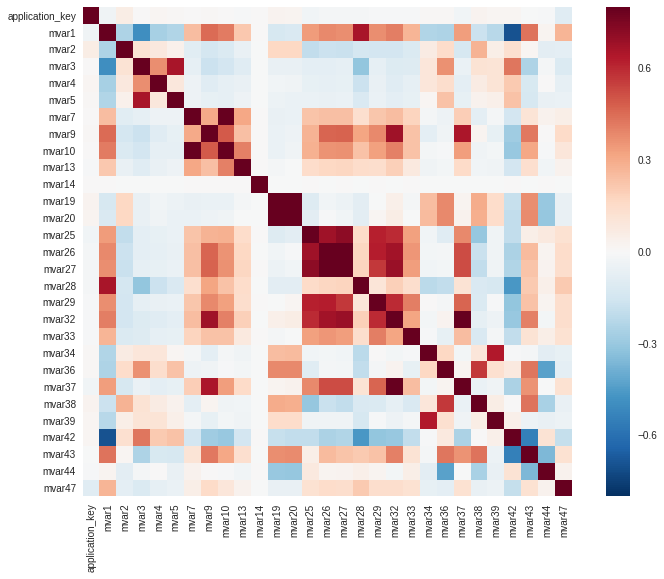

In [134]:
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
#Taking mean to impute datapoints of predict dataset
X_predict['mvar1'].fillna(X_predict['mvar1'].mean(), inplace=True)
X_predict['mvar2'].fillna(X_predict['mvar2'].mean(), inplace=True)
X_predict['mvar3'].fillna(X_predict['mvar3'].mean(), inplace=True)
X_predict['mvar4'].fillna(X_predict['mvar4'].mean(), inplace=True)
X_predict['mvar5'].fillna(X_predict['mvar5'].mean(), inplace=True)
#X_predict['mvar6'].fillna(X_predict['mvar6'].mean(), inplace=True)
X_predict['mvar7'].fillna(X_predict['mvar7'].mean(), inplace=True)
X_predict['mvar8'].fillna(X_predict['mvar8'].mean(), inplace=True)
X_predict['mvar9'].fillna(X_predict['mvar9'].mean(), inplace=True)
X_predict['mvar10'].fillna(X_predict['mvar10'].mean(), inplace=True)
X_predict['mvar12'].fillna(X_predict['mvar12'].mean(), inplace=True)
X_predict['mvar13'].fillna(X_predict['mvar13'].mean(), inplace=True)
X_predict['mvar16'].fillna(X_predict['mvar16'].mean(), inplace=True)
X_predict['mvar17'].fillna(X_predict['mvar17'].mean(), inplace=True)
X_predict['mvar18'].fillna(X_predict['mvar18'].mean(), inplace=True)
X_predict['mvar19'].fillna(X_predict['mvar19'].mean(), inplace=True)
X_predict['mvar20'].fillna(X_predict['mvar20'].mean(), inplace=True)
X_predict['mvar24'].fillna(X_predict['mvar24'].mean(), inplace=True)
X_predict['mvar25'].fillna(X_predict['mvar25'].mean(), inplace=True)
X_predict['mvar26'].fillna(X_predict['mvar26'].mean(), inplace=True)
X_predict['mvar27'].fillna(X_predict['mvar27'].mean(), inplace=True)
X_predict['mvar28'].fillna(X_predict['mvar28'].mean(), inplace=True)
X_predict['mvar29'].fillna(X_predict['mvar29'].mean(), inplace=True)
X_predict['mvar32'].fillna(X_predict['mvar32'].mean(), inplace=True)
X_predict['mvar33'].fillna(X_predict['mvar33'].mean(), inplace=True)
X_predict['mvar42'].fillna(X_predict['mvar42'].mean(), inplace=True)
X_predict['mvar43'].fillna(X_predict['mvar43'].mean(), inplace=True)
X_predict['mvar44'].fillna(X_predict['mvar44'].mean(), inplace=True)

#Imputing all missing values by mode
X_predict['mvar34'].fillna(X_predict['mvar34'].mean(), inplace=True)
X_predict['mvar36'].fillna(X_predict['mvar36'].mean(), inplace=True)
X_predict['mvar37'].fillna(X_predict['mvar37'].mean(), inplace=True)
X_predict['mvar38'].fillna(X_predict['mvar38'].mean(), inplace=True)
X_predict['mvar39'].fillna(X_predict['mvar39'].mean(), inplace=True)
#X_predict['mvar46'].fillna(X_predict['mvar46'].mode(), inplace=True)

#Imputing all missing values by 0 because it is occuring very frequntly
#X_predict['mvar46'].fillna(0, inplace=True)

In [0]:
#Making var2 values int to simplify data points(Logic is that it is score which needs to be simple)
X_train['mvar2'] = X_train['mvar2'].astype(int)
#X_train['mvar3'] = X_train['mvar3'].astype(int)

In [0]:
#Label C = 0 and L = 1 in both train and predict data set
var_mod = ['mvar47']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])

for i in var_mod:
    X_predict[i] = le.fit_transform(X_predict[i])

In [0]:
#Defining classification and prediction model
def classification_model(model, X_train, y_train):
  model.fit(X_train , y_train)
  
  predictions = model.predict(X_train)
  
  accuracy = metrics.accuracy_score(predictions , y_train)
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
  
  kf = KFold(X_train.shape[0], n_folds=5)
  error = []
  
  for train, test in kf:
    train_predictors = (X_train.iloc[train,:])
    train_target = y_train.iloc[train]
    model.fit(train_predictors , train_target)
    error.append(model.score(X_train.iloc[test,:], y_train.iloc[test]))
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  
  model.fit(X_train , y_train)

def predict_model(model , X_test):
  y_test = model.predict(X_test)
  return y_test

In [0]:
#Split trainset to train and test set
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.25)

In [30]:
#XGB Classifier (Till Now giving best score)
model = XGBClassifier()
model.fit(train_X , train_y)
y_pred = model.predict(test_X)
#predictions = [round(value) for value in y_pred]
#predict = np.array(predictions)
accuracy = metrics.accuracy_score(y_pred , test_y)
print ("Accuracy:", accuracy) 

Accuracy: 0.8076


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
#Predict the labels and save the label in csv file
y_predict = predict_model(model , X_predict)
output = pd.DataFrame({'Application Key': df_predict.application_key, 'Prediction': y_predict})
output.to_csv('Phineas&Ferb_IITKharagpur_10.csv', index=False)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [167]:
model = LogisticRegression()
classification_model(model , X_train , y_train)

Accuracy : 76.184%
Cross-Validation Score : 75.910%


In [0]:
#model = RandomForestClassifier(n_estimators=10)
#classification_model(model , X_train , y_train)

Accuracy : 98.377%
Cross-Validation Score : 78.723%


In [0]:
#model = DecisionTreeClassifier()
#classification_model(model , X_train , y_train)

Accuracy : 100.000%
Cross-Validation Score : 71.059%


In [0]:
#model = GaussianNB()
#model.fit(train_X , train_y)
#test_pred = model.predict(test_X)
#accuracy = metrics.accuracy_score(test_pred , test_y)
#print ("Accuracy:", accuracy) 

Accuracy: 0.5127


In [0]:
#model = Perceptron(random_state=42,max_iter=10000)
#model.fit(train_X, train_y)
#test_pred = model.predict(test_X)
#accuracy = metrics.accuracy_score(test_pred , test_y)
#print ("Accuracy:", accuracy)